# Population by Education Levels in Europe

### European Population by Education Level Attainment, grouped by Sex and Country

Description: Data containing education attainment level, also grouped by age group, sex and geography in Europe. Source is https://ec.europa.eu/eurostat/data/database (official European Data Source). Data is downloaded from the source, documented and uploaded to Kaggle. Dataset was taken from Kaggle and sourced from https://www.kaggle.com/gpreda/population-by-education-level-in-europe

### Summary of data attributes

Two datasets are provided, one tab seperated (TSV) and one comma separated (CSV). The TSV file contains the raw data. This dataset was used for this exercise in order to show case data cleaning skills. The CSV file has already been cleaned and transformed by the author of the dataset, Gabriel Preda. 

The TSV file contains 43 columns and 16052 rows. The first 5 columns (unit, sex, age, isced11, geography) represent social demographic variables, whereas the last 38 columns represent different years (1983 to 2020). These year columns represent temporal information and will need to be pivoted into one column with their asscoiated values in seperate column. 

Below is a summary of all of the social dempgraphic columns:

1. unit: contains only one unique value (THS) and was probably used as an ID column for a larger dataset
2. sex: contans three unique values - M, F and T. M is for male, F is for Female and T is the combined total of both. 
3. age: contains 29 unique values which represent different age groups. For example, Y15-19 represents all people between the ages of 15 and 19. The yongest age is 15 and the oldest age is 69.
4. isced11: contains the level of education attained. There are 5 unique values in this column which include ED0-2 (primary to secondary education only), ED3-4 (upper seconday to post secondary or non-tertiary education), ED5-8 (Bachelors to Doctoral education), NRP (No schooling) and TOTAL (total number of people with some form of schooling).
5. grography: contains the EU country codes for each individual european country. There are 39 unique values. 

### Preliminary plan for data exploration

This dataset contains a large amount of information with many dfferent areas to explore. It has information that can be used to identify similarities or differences between sexes, countries, age groups and years for levels of education attainment. 

For this project, I will narrow my focus on identifying any differences between countries over time for level of education attainment. I will first examine level of education over most generations from ahes 15 to 74 (represened by Y15-74 in the age column) across different countries. I will then pick a country wich harbours an interesting temporal pattern and look into detail how generations have differed in education level over time. 

### Data Cleaning and Feature Engineering

In [1]:
# Get libraries
import pandas as pd

# read in data as tab seperated
path = '/home/issy/gdrive/project_coursera/IBM_machinelearning/assessment/'
df = pd.read_csv(path+'lfsa_pgaed.tsv', sep='\t')

# one column needs to be seperated by commas. Will split into multiple columns using string split
col = df.iloc[:,0].str.split(',', expand=True)
col = col.set_axis(['unit', 'sex', 'age', 'isced11','geography'], axis = 1, inplace=False)

# merge columns and dataframe 
df = pd.concat([col,df.iloc[:,1:]], axis = 1)

df

,unit,sex,age,isced11,geography,2020,2019,2018,2017,2016,...,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983
0,THS,F,Y15-19,ED0-2,AT,149.8,149.6,149.2,151.2,155.0,...,:,:,:,:,:,:,:,:,:,:
1,THS,F,Y15-19,ED0-2,BE,247.9,243.4,243.7,238.6 b,224.1,...,213.8 b,:,:,:,:,:,:,:,:,:
2,THS,F,Y15-19,ED0-2,BG,128.4,124.2,120.6,127.4,126.3,...,:,:,:,:,:,:,:,:,:,:
3,THS,F,Y15-19,ED0-2,CH,168.2,166.3,174.6,172.7,174.3,...,:,:,:,:,:,:,:,:,:,:
4,THS,F,Y15-19,ED0-2,CY,16.8,17.5,16.9,17.3,17.5,...,:,:,:,:,:,:,:,:,:,:
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16047,THS,T,Y65-69,TOTAL,SE,538.8,546.3,555.2 b,564.5,581.7,...,:,:,:,:,:,:,:,:,:,:
16048,THS,T,Y65-69,TOTAL,SI,128.0,137.4,128.6,124.3,121.5,...,:,:,:,:,:,:,:,:,:,:
16049,THS,T,Y65-69,TOTAL,SK,329.4,319.8,310.1,297.6,278.8,...,:,:,:,:,:,:,:,:,:,:
16050,THS,T,Y65-69,TOTAL,TR,2776.1,2705.2,2545.0,2455.7,2287.0,...,:,:,:,:,:,:,:,:,:,:


There are 16052 rows × 43 columns.

In [2]:
# get number of unique values for first 5 columns
df.apply(lambda col: col.nunique()).head()

unit          1
sex           3
age          29
isced11       5
geography    39
dtype: int64

The unit column only has one value and appears redundant. 

In [3]:
# Remove unit as it is redundant having only 1 value for all rows
df = df.iloc[:,1:]

In [4]:
# Place all years into one column and their values into another column
df = df.melt(['sex','age','isced11','geography'])
df.rename(columns={'variable':'date'}, inplace=True)
df.head()

,sex,age,isced11,geography,date,value
0,F,Y15-19,ED0-2,AT,2020,149.8
1,F,Y15-19,ED0-2,BE,2020,247.9
2,F,Y15-19,ED0-2,BG,2020,128.4
3,F,Y15-19,ED0-2,CH,2020,168.2
4,F,Y15-19,ED0-2,CY,2020,16.8


In [5]:
# get unique values for first 5 columns
for i in range(4):
    print(df.columns[i],': ', df.iloc[:,i].unique())
    print(' ')

sex :  ['F' 'M' 'T']
 
age :  ['Y15-19' 'Y15-24' 'Y15-39' 'Y15-59' 'Y15-64' 'Y15-74' 'Y20-24' 'Y20-64'
 'Y25-29' 'Y25-39' 'Y25-49' 'Y25-54' 'Y25-59' 'Y25-64' 'Y25-74' 'Y30-34'
 'Y35-39' 'Y40-44' 'Y40-59' 'Y40-64' 'Y45-49' 'Y50-54' 'Y50-59' 'Y50-64'
 'Y50-74' 'Y55-59' 'Y55-64' 'Y60-64' 'Y65-69']
 
isced11 :  ['ED0-2' 'ED3_4' 'ED5-8' 'NRP' 'TOTAL']
 
geography :  ['AT' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EA19' 'EE' 'EL' 'ES' 'EU15'
 'EU27_2020' 'EU28' 'FI' 'FR' 'HR' 'HU' 'IE' 'IS' 'IT' 'LT' 'LU' 'LV' 'ME'
 'MK' 'MT' 'NL' 'NO' 'PL' 'PT' 'RO' 'RS' 'SE' 'SI' 'SK' 'TR' 'UK']
 


In [6]:
# There appears to be some strange country codes such as EA19, EU15, EU27_2020 and EU28
# I will take these rows out 
l = ["EA19", "EU15", "EU27_2020", "EU28"]
for i in range(len(l)):
    df = df[df.geography != l[i]]

In [7]:
# subset dataframe to remove NRP and TOTAl catergories
df = df[df.isced11 != 'NRP']
df = df[df.isced11 != 'TOTAL']

# rename education categories to smplify them and make them more intuitive
df.isced11 = df.isced11.replace(['ED0-2','ED3_4','ED5-8'], ['Primary School', 'High School', 'University'])

In [8]:
# Lets add a column with the country name that is asscoiated with the country code columns

countries = {"BE":"Belgium", "EL":"Greece", "LT":"Lithuania", "PT":"Portugal", "BG":"Bulgaria", "ES":"Spain", "LU":"Luxembourg", "RO":"Romania", 
             "CZ":"Czechia", "FR":"France", "HU":"Hungary", "SI":"Slovenia", "DK":"Denmark", "DE":"Germany", "HR":"Croatia","MT":"Malta", 
            "SK":"Slovakia","IT":"Italy","NL":"Netherlands","FI":"Finland","EE":"Estonia","CY":"Cyprus","AT":"Austria","SE":"Sweden","IE":"Ireland",
            "LV":"Latvia","PL":"Poland","IS":"Iceland","NO":"Norway","LI":"Lichtenstein","CH":"Switserland","UK":"United Kingdom","ME":"Montenegro",
            "MK":"North Macedonia","AL":"Albaia","RS":"Serbia","TR":"Turkey","BA":"Bosnia and Herzegovina","XK":"Kosovo","AM":"Armenia","BY":"Belarus",
            "GE":"Georgia","AZ":"Azerbaijan","MD":"Moldova","UA":"Ukraine", "RU":"Russia"}

df['country'] = df['geography'].map(countries)

In [9]:
# change index to datetime object using the year variable
df.index = pd.to_datetime(df['date'])
df.head()

,sex,age,isced11,geography,date,value,country
date,,,,,,,
2020-01-01,F,Y15-19,Primary School,AT,2020,149.8,Austria
2020-01-01,F,Y15-19,Primary School,BE,2020,247.9,Belgium
2020-01-01,F,Y15-19,Primary School,BG,2020,128.4,Bulgaria
2020-01-01,F,Y15-19,Primary School,CH,2020,168.2,Switserland
2020-01-01,F,Y15-19,Primary School,CY,2020,16.8,Cyprus


In [10]:
# get the datatypes if all columns
df.dtypes

sex          object
age          object
isced11      object
geography    object
date         object
value        object
country      object
dtype: object

In [11]:
# Change datatypes to catgrorical 
for col in ['sex', 'isced11', 'geography', 'date', 'age']: df[col] = df[col].astype('category')
    
# The value column has some strange letters in there. Remove the letters and convert to numerical
df['value'] = df['value'].str.replace(r'\D', '',regex=True)
df['value'] = pd.to_numeric(df['value'])

In [12]:
df.dtypes

sex          category
age          category
isced11      category
geography    category
date         category
value         float64
country        object
dtype: object

In [13]:
# lets look for null values
df.isnull().any()

sex          False
age          False
isced11      False
geography    False
date         False
value         True
country      False
dtype: bool

In [14]:
# How percentage of null values in value
round((df['value'].isna().sum() / len(df.index))*100)
# We have a lot of null values - almost 40%

38

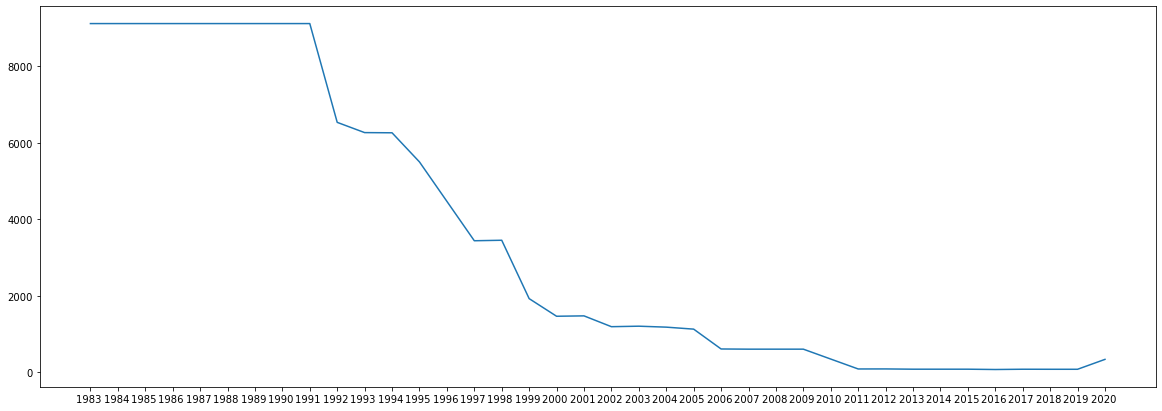

In [15]:
# which groups have most of the null values?
import matplotlib.pyplot as plt

# date might be a good candidate
date = df.value.isnull().groupby([df['date']]).sum().astype(int).reset_index(name='count')
plt.figure(figsize=(20, 7))
plt.plot(date['date'], date['count']);

In [16]:
# lets subset data so that we only have data for everything after the year 2000
mask = df.index > '1999-12-31'
df = df.loc[mask]

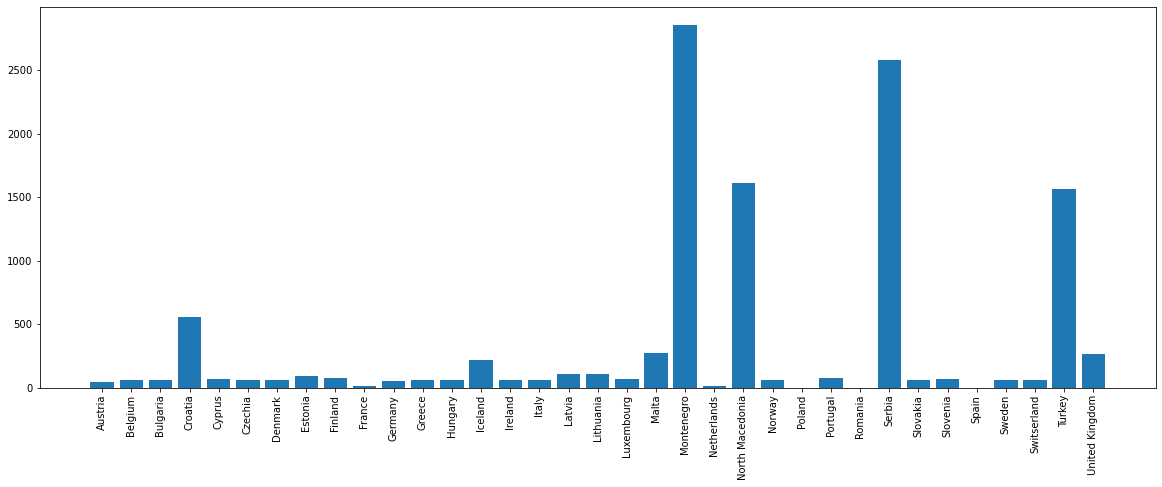

In [17]:
country = df.value.isnull().groupby([df['country']]).sum().astype(int).reset_index(name='count')
plt.figure(figsize=(20, 7))
plt.bar(country['country'], country['count'])
plt.xticks(rotation=90);

# looks like there are a lot of NaNs for Croatia, Montenegro, North Macedonia, Serbia, Turkey and United Kingdom

In [18]:
# what are the percentage of NaNs now
round((df['value'].isna().sum() / len(df.index))*100)
# We have reduce NaNs by a lot now!

6

### Data Exploration

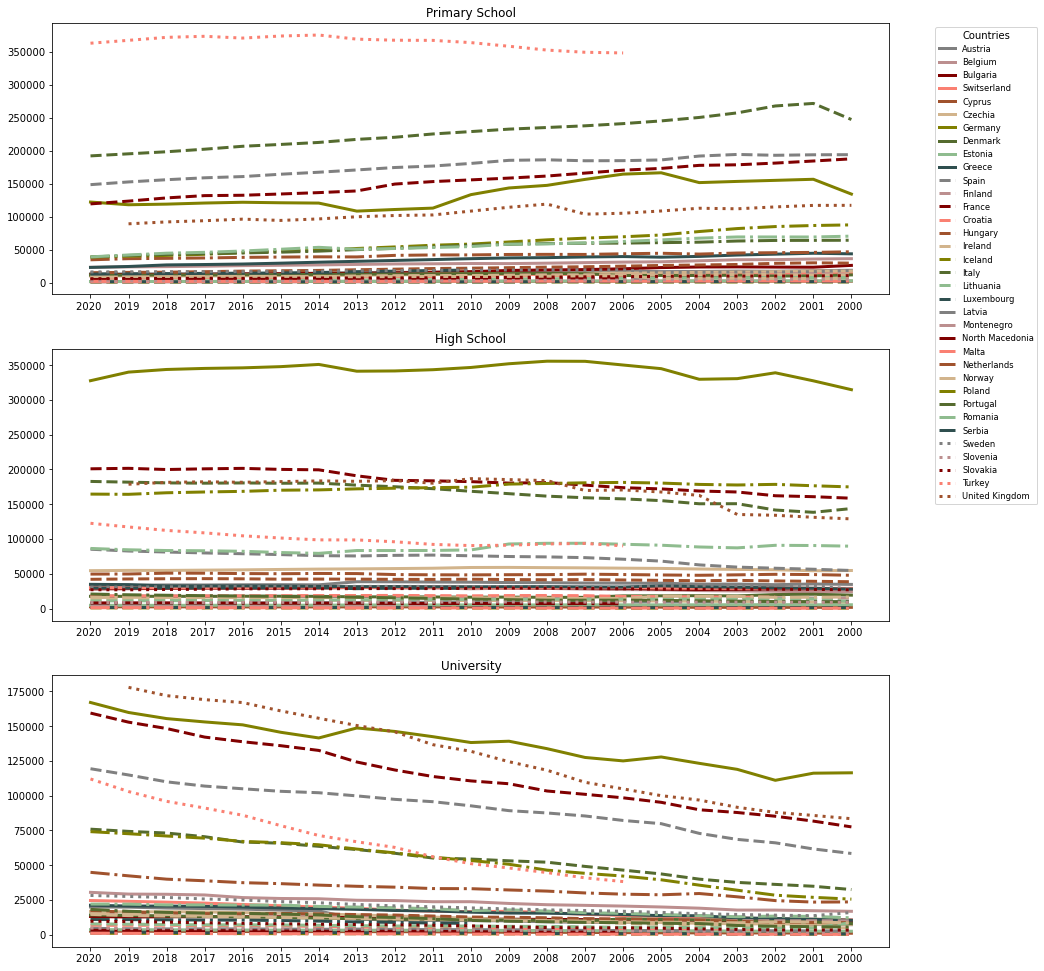

In [19]:
# plot multiple plots for each country. Sex will include both males and females
import numpy as np
import itertools

# lets look at the entire population 
df2 = df[df.age == 'Y15-74']

edu_list = df2.isced11.unique()
countries = df2.country.unique()

fig, ax = plt.subplots(3, figsize=(15, 17))

# create a larger colormap and line styles to distinguish all of the countries
markers = ['-','--','-.',':']
colors = ['gray','rosybrown','maroon','salmon','sienna','tan','olive','darkolivegreen','darkseagreen','darkslategray']
mc_list = list(itertools.product(markers, colors))

for x in range(len(edu_list)):
    education = df2[df2.isced11 == edu_list[x]]
    for i in range(len(countries)):
        data = education[education.country == countries[i]]
        mkr, col = mc_list[i]
        ax[x].plot(data[data.sex == 'T'].date, data[data.sex == 'T'].value, label=countries[i], color=col, linestyle=mkr, linewidth=3)
        ax[x].set_title(edu_list[x])

# Add in a nice legend
ax[0].legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small');

### Lets Explore Turkey

In [20]:
# subset dataframe to show only Turkey
df_TR = df[df['geography'] == 'TR'].reset_index(drop=True)

# subset dataframe so that we only have dates from 2006 onwards (there is no data earlier than that for Turkey), age groups Y15-24, 25-49, 50-74 and only M and F
df_TR = df_TR[pd.to_numeric(df_TR['date']) > 2005] # get correct dates
df_TR = df_TR[df_TR['age'].isin(['Y15-24','Y25-49','Y50-74'])] # get only 3 main age groups
df_TR = df_TR[df_TR['sex'].isin(['F','M'])] # get only male and female entries

# remove unused categories
df_TR.date = df_TR.date.cat.remove_unused_categories()
df_TR.age = df_TR.age.cat.remove_unused_categories()
df_TR.sex = df_TR.sex.cat.remove_unused_categories()

# Group all of the variables 
df_TR = df_TR.groupby(['date','age','isced11','sex'])['value'].sum().reset_index()

# lets reset the index
df_TR = df_TR.reset_index(drop=True).copy()

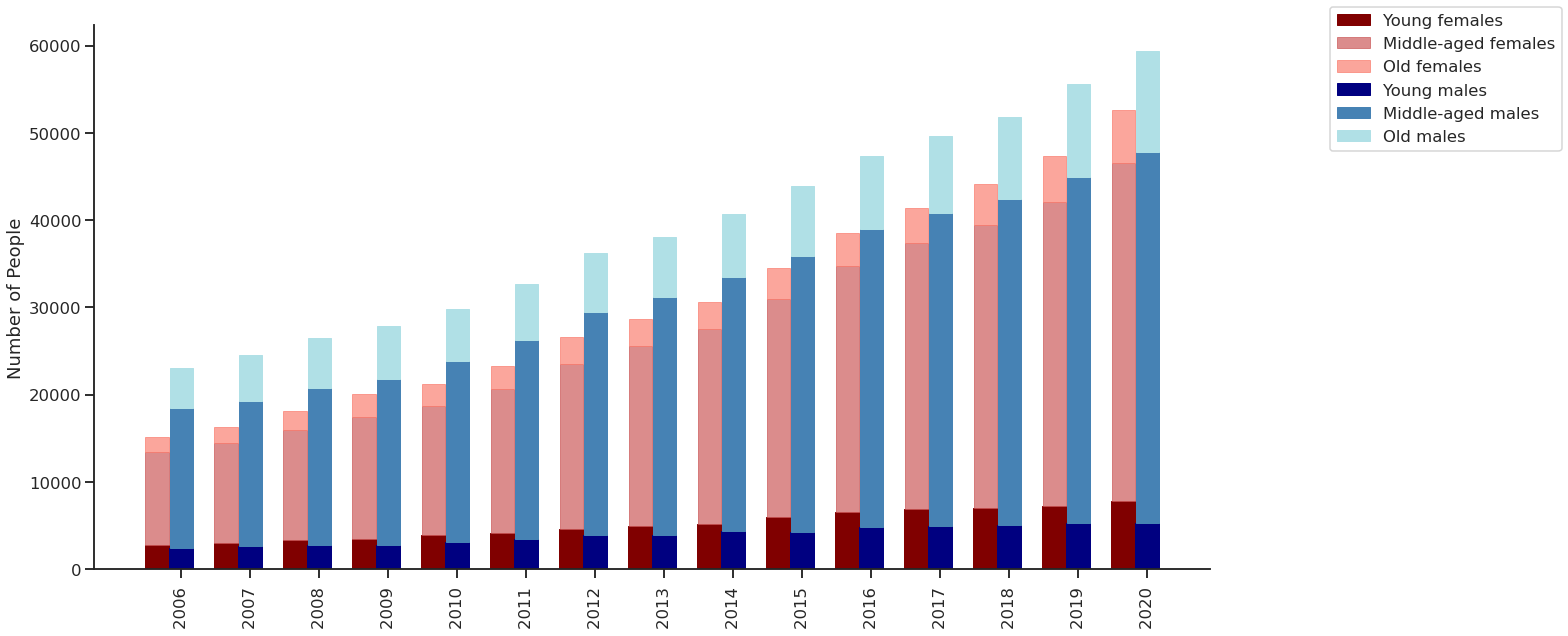

In [21]:
# bar chart 1: look at univeristy
import seaborn as sns
from matplotlib.pyplot import figure
uni = df_TR[df_TR['isced11'] == 'University']

figure(figsize=(20, 10))

# create data
Y15_f = np.array(uni[(uni['age'] == 'Y15-24') & (uni['sex'] == 'F')].value)
Y25_f = np.array(uni[(uni['age'] == 'Y25-49') & (uni['sex'] == 'F')].value)
Y50_f = np.array(uni[(uni['age'] == 'Y50-74') & (uni['sex'] == 'F')].value)
Y15_m = np.array(uni[(uni['age'] == 'Y15-24') & (uni['sex'] == 'M')].value)
Y25_m = np.array(uni[(uni['age'] == 'Y25-49') & (uni['sex'] == 'M')].value)
Y50_m = np.array(uni[(uni['age'] == 'Y50-74') & (uni['sex'] == 'M')].value)

with sns.axes_style("white"):
    sns.set_style("ticks")
    sns.set_context("talk")
    
    # plot details
    bar_width = 0.35
    epsilon = .015
    line_width = 1
    opacity = 0.7
    pos_bar_positions = np.arange(len(Y15_f))
    neg_bar_positions = pos_bar_positions + bar_width

    # make bar plots
    Y15_f_bar = plt.bar(pos_bar_positions, Y15_f, bar_width,
                              color='maroon',
                        linewidth=line_width,
                        edgecolor='maroon',
                              label='Young females')
    
    Y25_f_bar = plt.bar(pos_bar_positions, Y25_f, bar_width-epsilon,
                              bottom=Y15_f,
                              alpha=opacity,
                              color='indianred',
                              edgecolor='indianred',
                              linewidth=line_width,
                              label='Middle-aged females')
    
    Y50_f_bar = plt.bar(pos_bar_positions, Y50_f, bar_width-epsilon,
                               bottom=Y25_f+Y15_f,
                               alpha=opacity,
                               color='salmon',
                               edgecolor='salmon',
                               linewidth=line_width,
                               label='Old females')
    
    Y15_m_bar = plt.bar(neg_bar_positions, Y15_m, bar_width,
                              color='navy',
                        edgecolor='navy',
                        linewidth=line_width,
                              label='Young males')
    
    hpv_neg_cna_bar = plt.bar(neg_bar_positions, Y25_m, bar_width-epsilon,
                              bottom=Y15_m,
                              color="steelblue",
                              edgecolor='steelblue',
                              linewidth=line_width,
                              label='Middle-aged males')
    
    hpv_neg_both_bar = plt.bar(neg_bar_positions, Y50_m, bar_width-epsilon,
                               bottom=Y25_m+Y15_m,
                               color="powderblue",
                               edgecolor='powderblue',
                               linewidth=line_width,
                               label='Old males')
    plt.xticks(neg_bar_positions, uni.date.unique(), rotation=90)
    plt.ylabel('Number of People')
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    sns.despine()

### Key Insights

There are several countries that look interesting for further examination.

For example, Turkey appears to have a high primary school only educated population, but it's universty educated population is rapidly growing in recent years. Additonally, Women appear to be gaining in the number of universty degrees in Turkey. The younger generation of women have overtaken men in turkey for university degree. It would be interesting to see if this trend is occuring all over Europe. 

### Hypothesis Testing

Three possible research questions that could be examined include:

1) Across Europe, are more women with univeristy degrees in 2020 than in the past, say ten years ago?
2) In Euope, are there more women attending univeristy than men in 2020
3) Are there more people with univeristy degrees in european countries inside the european union when compared to those outside.

Hypotheses statements could be:

1. There is a significantly larger number of women with univeristy degrees in 2020 than in 2010 in Europe. 
2. In 2020, there is a significatly higher number of women with university degrees than men across Europe.
3. In 2020, Euopean countries inside the European Union have larger number of people with univeristy degrees than european countries outide the EU. 

### Performing a signficance test

Lets test the first research question: Across Europe, are there more women with univeristy degrees in 2020 than in 2010?

H1: There is a significantly larger number of women with univeristy degrees in 2020 than in 2010 in Europe. 

H0: There is no difference in the number of women with univeristy degrees in 2020 than in 2010 in Europe. 

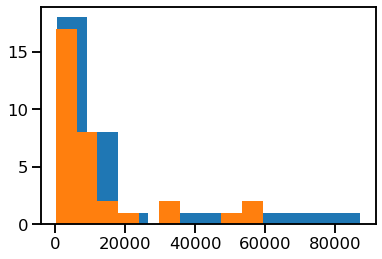

In [47]:
# montengro and united kingdom have NAs for university females in 2020 and 2010. I will exclude them from the analysis.
df2 = df[(df.geography != 'UK') & (df.geography != 'ME')]

# get datasets
df_2020 = df2[(df2['age'] == 'Y15-74') & (df2['sex'] == 'F') & (df2['isced11'] == 'University')  & (df2['date'] == '2020 ')]
df_2010 = df2[(df2['age'] == 'Y15-74') & (df2['sex'] == 'F') & (df2['isced11'] == 'University')  & (df2['date'] == '2010 ')]

# plot histograms 
from matplotlib import pyplot
import numpy

pyplot.hist(df_2020.value)
pyplot.hist(df_2010.value);

It looks like my data is heavily skewed. Should use a non-parametric test such as Mann-Whitney U Test.

In [48]:
# lets test whether more women are attending univeristy in 2020 than in 2010 across European countries
# we will be using a Mann-Whitney U Test to see whether number of women attending univeristy is signifcantly larger on average in 2020 than in 2010 
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(df_2020.value, df_2010.value)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=436.000, p=0.083


p value is above alpha threshold of 0.05 suggesting that there is no difference between 2020 and 2010 for number of women with a higher degree in Europe. 

### Sugestions for further analysis

This dataset only shows the total number of people for each year and ach age group. It would be more interesting to look at percentages per populations and to do this, a dataset with population information for each country across several years could be downloaded and incorporated. 

This data did not come with an adequate level of information describing its variables and values. For much of it I had to assume some things.